Zeroes =  [2.40482556 3.83170597 5.52007811 8.65372791]
Energies =  [ 5.78318596 14.68197064 30.47126234 74.88700679]
Integral =  0.5190955793290257
Integral =  0.40271911976298325
Integral =  0.3402307751790756
Integral =  0.27142514855796185


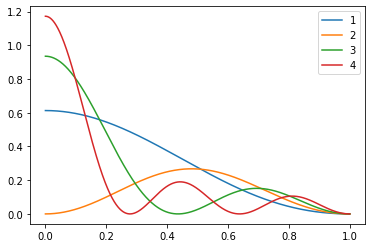

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as sc

n = 0
z1 = sc.jn_zeros(n, 3)
n = 1
z2 = sc.jn_zeros(n,1)

z = np.concatenate([z1,z2])
z_nm = np.sort(z)
print ("Zeroes = ",z_nm)

m = np.array([1,1,2,3])
n = np.array([0,1,0,0])

a = 1
hbar = 1
mass = 0.5

E = hbar**2*z_nm**2/(2.0*mass*a**2)

print ("Energies = ",E)

npts = 10000
jvalue = np.zeros(npts)

for i in range(4):
    rho = np.linspace(0.0,a,npts)
    k = np.sqrt(2.0*mass*E[i])/(hbar**2)
    for j in range(npts):
        jvalue[j] = sc.jv(n[i],k*rho[j])
        #print (rho[j],jvalue[i])
    #print (jvalue)
    c_nm = 1.0/np.sqrt(np.pi*a**2*np.abs(sc.jv(n[i]+1,z_nm[i])))
    #print ("values = ",sc.jv(n[i],z_nm[i]),sc.jv(n[i]+1,z_nm[i]))
    R = jvalue*c_nm
    psi_squared = R**2
    psi_squared_r = psi_squared*rho
    plt.plot(rho,psi_squared,label=i+1)
    #plt.plot(rho,psi_squared_r,label=i+1)
    
    integral = 0.0
    for j in range(npts):
        integral = integral + psi_squared[j]*rho[j]*2.0*np.pi*a/npts
    print ("Integral = ",integral)
plt.legend()